# **Predicting 10 year risk of Coronary Heart Disease using Logistic regression**

*Data Preprocessing*

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Importing the dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/framingham-heart-study-dataset/framingham.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [3]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Checking how the columns of missing values are distributed

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


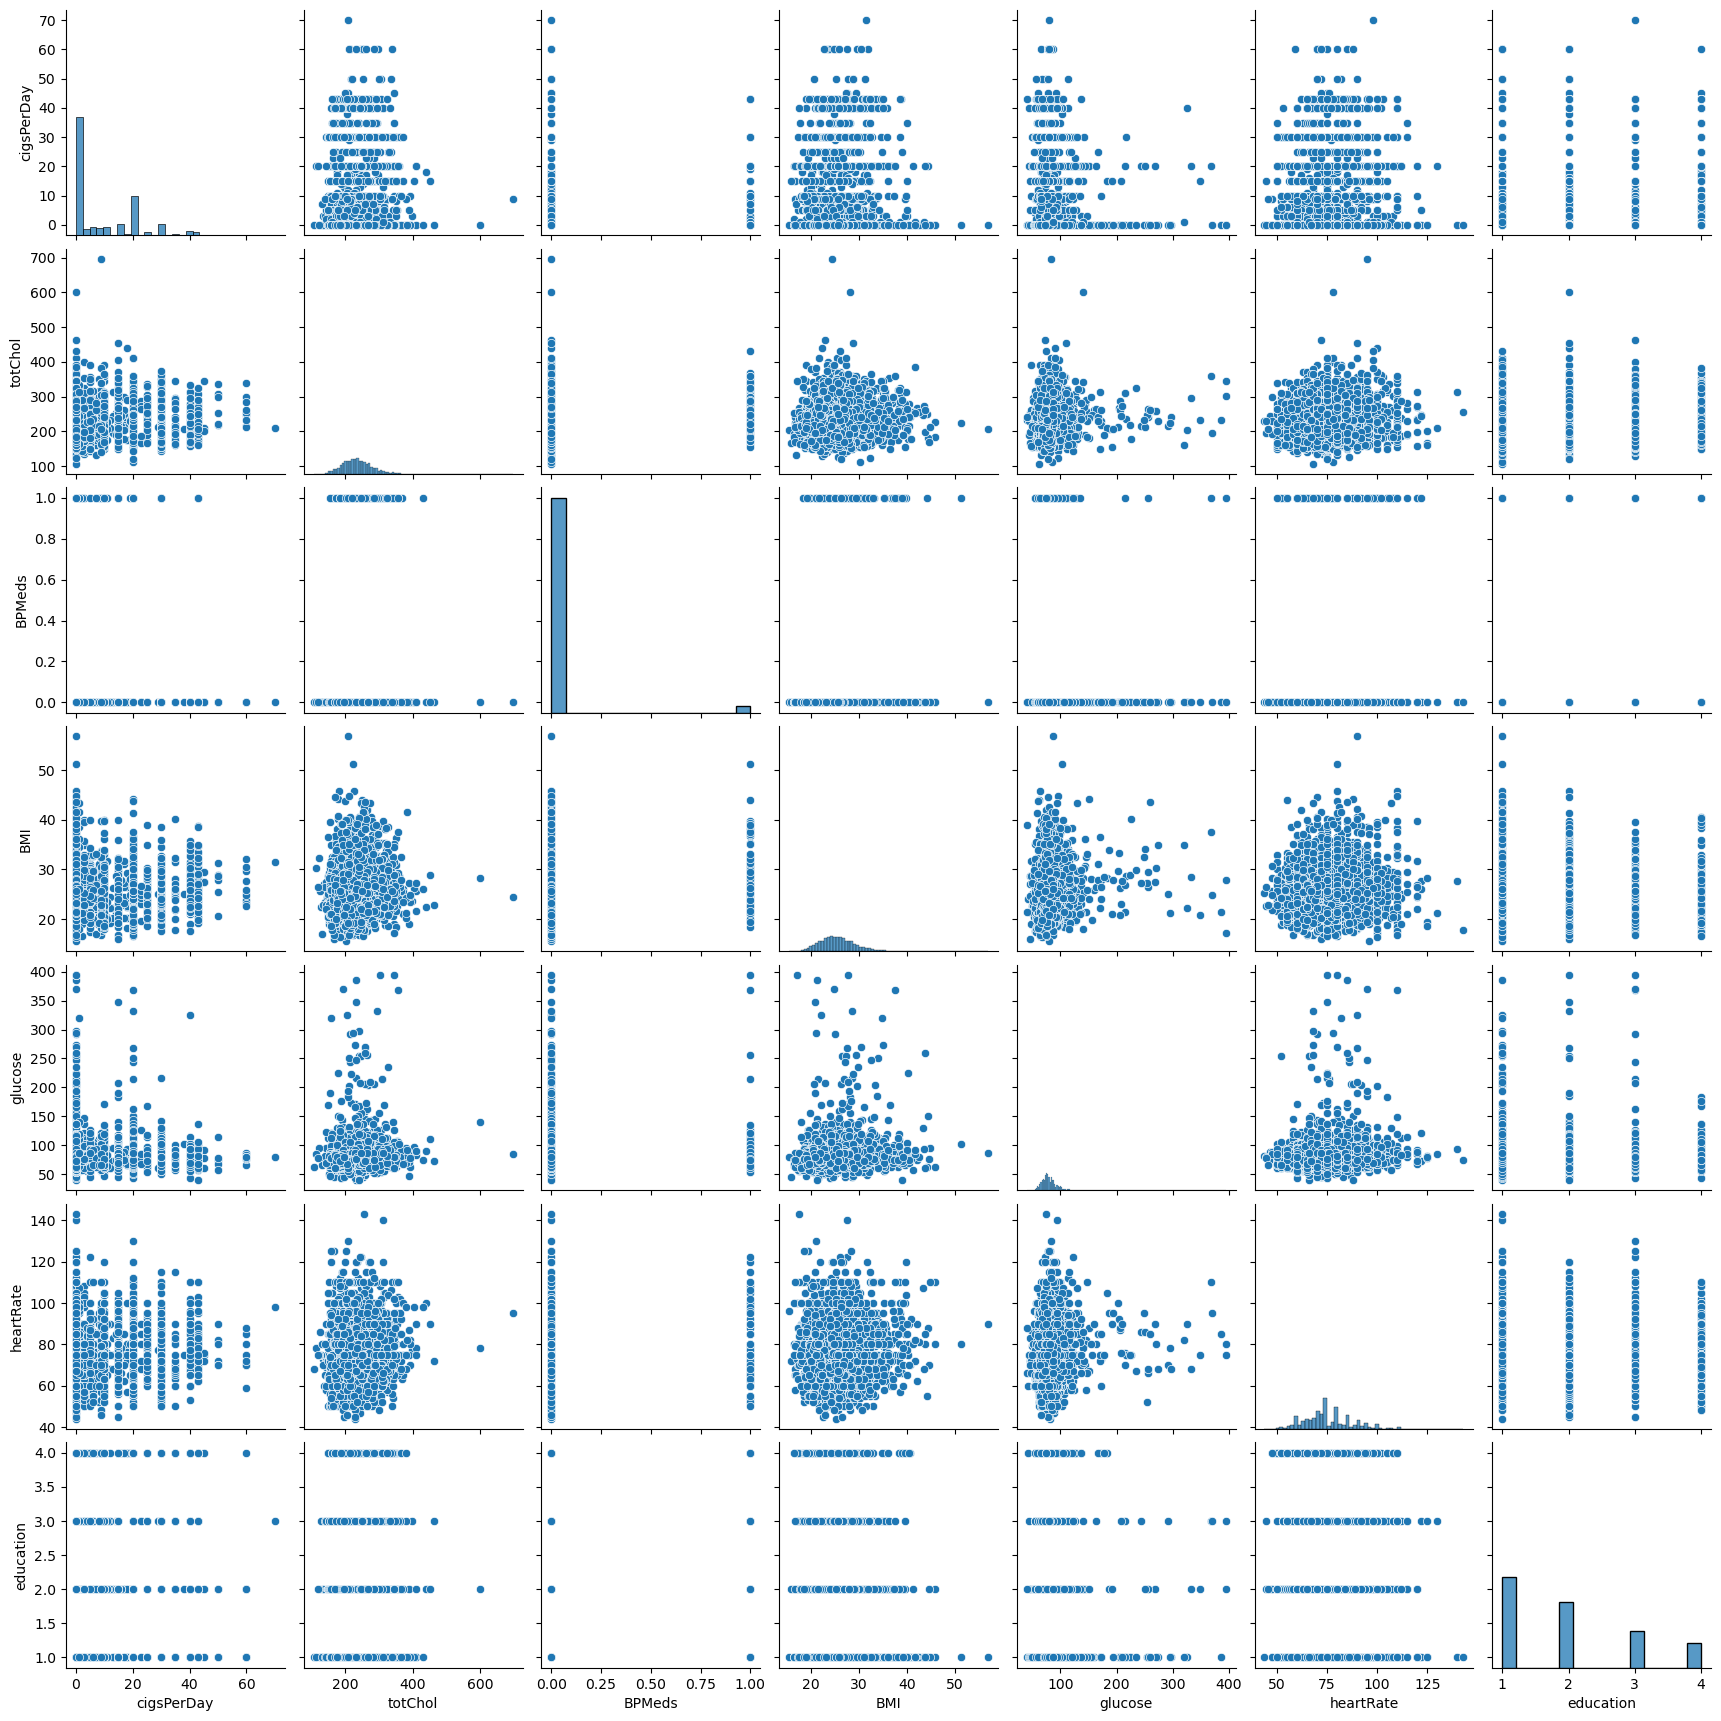

In [5]:
sns.pairplot(dataset,vars=['cigsPerDay','totChol','BPMeds','BMI','glucose','heartRate','education'])
plt.show()

As 'glucose' , 'BMI','totChol' and 'heartRate' are following normal distribution; so the missing values are going to be filled with normally distributed  random values.

In [6]:
# Calculating the mean and standard deviations
mean_glucose = dataset['glucose'].mean()
std_glucose = dataset['glucose'].std()
print(mean_glucose, std_glucose)

mean_BMI = dataset['BMI'].mean()
std_BMI = dataset['BMI'].std()
print(mean_BMI, std_BMI)

mean_totChol = dataset['totChol'].mean()
std_totChol = dataset['totChol'].std()
print(mean_totChol, std_totChol)

mean_heartRate = dataset['heartRate'].mean()
std_heartRate = dataset['heartRate'].std()
print(mean_heartRate, std_heartRate)


# Filling the null values
dataset['glucose'] = dataset['glucose'].fillna(pd.Series(np.random.normal(mean_glucose, std_glucose, size=len(dataset))))
dataset['BMI'] = dataset['BMI'].fillna(pd.Series(np.random.normal(mean_BMI, std_BMI, size=len(dataset))))
dataset['totChol'] = dataset['totChol'].fillna(pd.Series(np.random.normal(mean_totChol, std_totChol, size=len(dataset))))
dataset['heartRate'] = dataset['heartRate'].fillna(pd.Series(np.random.normal(mean_heartRate, std_heartRate, size=len(dataset))))



81.96365524402907 23.954334811344744
25.80080075811419 4.079840168944382
236.69952267303103 44.59128386860701
75.87898089171975 12.025347984469386


In [7]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


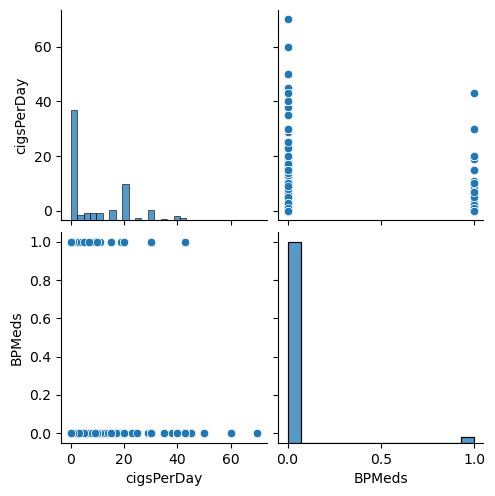

In [8]:
sns.pairplot(dataset,vars=['cigsPerDay','BPMeds'])
plt.show()

In [9]:
dataset['BPMeds'].value_counts()

0.0    4063
1.0     124
Name: BPMeds, dtype: int64

As most of them did't had BP meds. I'll consider the the null values as Zero

In [10]:
dataset['BPMeds'] = dataset['BPMeds'].fillna(0)
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

I'll go with the mean for the null values of 'cigsPerDay'. And I'll drop all NaN values from the dataset as the education column is loosely correlated with the dependent variable

In [11]:
dataset['cigsPerDay'] = dataset['cigsPerDay'].fillna(dataset['cigsPerDay'].mean())
dataset = dataset.dropna()
dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Cheching the dependent variable if there is any majority class

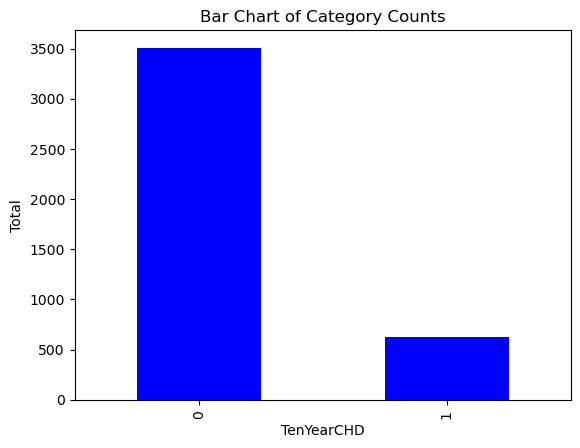

In [12]:
category_counts = dataset['TenYearCHD'].value_counts()
category_counts.plot(kind='bar', color='blue')

plt.xlabel('TenYearCHD')
plt.ylabel('Total')
plt.title('Bar Chart of Category Counts')

plt.show()

Clearly, 0 is the majority class. But as this is a medical dataset, so the true positive values will be the most important ones to classify correctly. If I keep the '0' rows more than the '1' rows, my model will pick the features of '0' rows as the dominant. But I don't want to accurately classify the true negatives. My main goal is to accurately classify the true positive values and avoid type 2 error (predicting false positive).

So I'll make the '1' rows dominant. For this, I'll use the undersampling method to randomly sample the '0' row data points.

In [13]:
def perform_random_undersampling(data, majority_class_value, undersample_size, random_state=42):

    # Separate the majority and minority classes
    majority_class = data[data['TenYearCHD'] == majority_class_value]
    minority_class = data[data['TenYearCHD'] != majority_class_value]

    # Randomly select a subset from the majority class
    undersampled_majority = majority_class.sample(
        n=undersample_size, random_state=random_state)

    # Concatenate the undersampled majority class with the minority class
    balanced_data = pd.concat([undersampled_majority, minority_class])

    # Shuffle the combined dataset
    balanced_data = balanced_data.sample(
        frac=1, random_state=random_state).reset_index(drop=True)

    return balanced_data


dataset = perform_random_undersampling(
    dataset, majority_class_value=0, undersample_size=200)
dataset.shape

(828, 16)

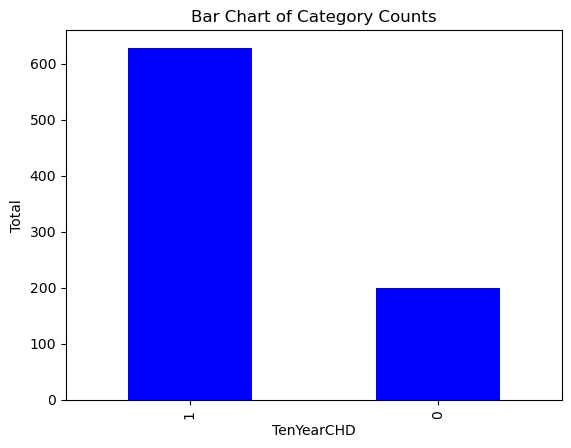

In [14]:
category_counts = dataset['TenYearCHD'].value_counts()
category_counts.plot(kind='bar', color='blue')

plt.xlabel('TenYearCHD')
plt.ylabel('Total')
plt.title('Bar Chart of Category Counts')

plt.show()

Checking the ratio

In [15]:
value_count = dataset['TenYearCHD'].value_counts()
print(value_count)

ratio =value_count[1]/len(dataset)
ratio

1    628
0    200
Name: TenYearCHD, dtype: int64


0.7584541062801933

Differentiating the independent values and the dependent values

In [16]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X.shape,y.shape)

(828, 15) (828,)


Splitting the dataset into Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

Checking the ratio of dependent variables in the training and test set

In [18]:
counts = np.bincount(y_train)
trainSetRatio = counts[1] / np.sum(counts)

counts = np.bincount(y_test)
testSetRatio = counts[1] / np.sum(counts)

print(trainSetRatio,testSetRatio)


0.7583081570996979 0.7590361445783133


Feature scaling 


In [19]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train  = sc_X.fit_transform(X_train)
X_test  = sc_X.transform(X_test)
X_test.shape

(166, 15)

Fitting Logistic Regression to the Training Set

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

Predicting the Test Set results

In [21]:
y_pred = classifier.predict(X_test)

Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[  6,  34],
       [  4, 122]])

Visualizing the Confusion Matrix

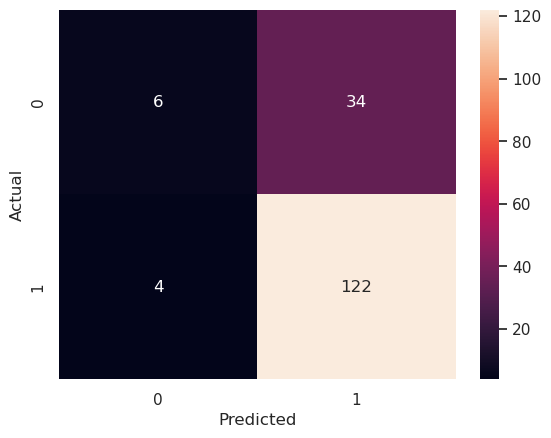

In [23]:
df_cm =pd.DataFrame(cm)
sns.set()
sns.heatmap(df_cm, annot=True,fmt = 'd')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Precision , Recall, F1 score and Accuracy of the model

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

accuracy = accuracy_score(y_pred=y_pred,y_true=y_test)
precision =precision_score(y_pred=y_pred,y_true=y_test)
recall = recall_score(y_pred=y_pred,y_true=y_test)
f1 = f1_score(y_pred=y_pred,y_true=y_test)
report  = classification_report(y_pred, y_test)

print("Accuracy on Test set: {:.2f} %".format(accuracy*100))
print("Precision on Test set: {:.2f} %".format(precision*100))
print("Recall on Test set: {:.2f} %".format(recall*100))
print("F1 Score on Test set: {:.2f} %".format(f1*100))
print(report)

Accuracy on Test set: 77.11 %
Precision on Test set: 78.21 %
Recall on Test set: 96.83 %
F1 Score on Test set: 86.52 %
              precision    recall  f1-score   support

           0       0.15      0.60      0.24        10
           1       0.97      0.78      0.87       156

    accuracy                           0.77       166
   macro avg       0.56      0.69      0.55       166
weighted avg       0.92      0.77      0.83       166



Here, the recall or the True positive rate is higher. that's the goal I wanted to achieve. It means the model did accurately classify almost all positive instances of the CHD. The F1 score is also great. That means the balance between precision and recall is very good.